In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [6]:
users=pd.read_csv(r'C:\Users\Shubham Jagtap\Downloads\User_rating_final_1K_users.csv')
trails=pd.read_excel(r'C:\Users\Shubham Jagtap\Downloads\All trail (Complete).xlsx')

In [7]:
df = pd.merge(users, trails, on='Trail_id' , how='left')

In [8]:
df.head()

,userID,Trail_id,rating,timestamp,Name,Location,Eleivation_Gain,AVG_Rating,estimateTime,Description,...,Activity Type 6,Activity Type 7,Activity Type 8,Activity Type 9,Activity Type 10,Activity Type 11,Activity Type 12,Activity Type 13,Activity Type 14,Activity Type 15
0,1,2,3.0,2002-3-10 23:20,Howth Loop Trail,"Howth, County Dublin, Ireland","1,459 ft",4.9,5 h 7 m,Enjoy stunning scenery as you follow the cliff...,...,Wildlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,29,3.0,18-08-2013 02:05,Gap of Dunloe,Killarney National Park,1208 ft,3.6,7 h 9 m,This is simply a must do for anybody in Kerry ...,...,Paved,River,Views,Wildlife,Wildflowers,NaN,NaN,NaN,NaN,NaN
2,1,32,4.0,2005-3-6 1:04,Carrauntoohil Loop,"Killorglin, County Kerry, Ireland",2072 ft,4.3,5 h 18 m,This is a brilliant hike that offers the oppor...,...,Lake,River,Views,Wildlife,Wildflowers,Rocky,Scramble,No shade,NaN,NaN
3,1,47,2.0,16-04-1996 09:48,Ballycuggeran Loop,"Derrycastle, County Tipperary, Ireland",1222 ft,3.1,2 h 25 m,This walk ascends along forest paths and offer...,...,forest,lake,views,wildlife,wildflowers,NaN,NaN,NaN,NaN,NaN
4,1,50,3.0,1996-1-12 15:48,Devil's Bit Mountain and Kilduff Mountain,"Templemore, County Tipperary, Ireland",1768 ft,4.0,5 h,From the top of Devil's Bit Mountain you will ...,...,forest,views,wildlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce').fillna(0).astype(np.int64)
#df['timestamp']= df['timestamp'].apply(datetime.fromtimestamp)

In [18]:
df['timestamp']= df['timestamp'].apply(datetime.fromtimestamp)

In [20]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['date'] = df['timestamp'].dt.date
df = df.sort_values('timestamp').reset_index(drop=True)

In [21]:
df.head()

,userID,Trail_id,rating,timestamp,Name,Location,Eleivation_Gain,AVG_Rating,estimateTime,Description,...,Activity Type 9,Activity Type 10,Activity Type 11,Activity Type 12,Activity Type 13,Activity Type 14,Activity Type 15,year,month,date
0,1,2,3.0,1970-01-01,Howth Loop Trail,"Howth, County Dublin, Ireland","1,459 ft",4.9,5 h 7 m,Enjoy stunning scenery as you follow the cliff...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
1,679,2,3.0,1970-01-01,Howth Loop Trail,"Howth, County Dublin, Ireland","1,459 ft",4.9,5 h 7 m,Enjoy stunning scenery as you follow the cliff...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
2,678,700,4.5,1970-01-01,Round Beltra Lake,"Newport, County Mayo, Ireland",1383 ft,3.7,36 m,Round Beltra Lake is a 19.0 kilometer loop tra...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
3,678,662,3.0,1970-01-01,Ravensdale Forest Short Circular,Ravensdale Forest,1960 ft,3.3,37 m,Ravensdale Forest Circular is a 5.9 mile loop ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
4,678,628,4.0,1970-01-01,Tomaneena Tmn via R Road,Wicklow Mountains National Park,1009 ft,3.4,1 h 11 m,Tomaneena Tmn via R756 Road is a 1.7 mile poin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01


In [24]:
print('Years:', df.year.unique())
print('Months', df.month.unique())
print('#Unique users:', df.userID.nunique())
print('#Unique trails:', df.Trail_id.nunique())
print('Unique ratings:', df.rating.unique())
print('Average rating:', round(df.rating.mean(), 2))
print('Frequency of each rating value:')
print(df['rating'].value_counts())


Years: [1970]
Months [1]
#Unique users: 994
#Unique trails: 648
Unique ratings: [3.  4.5 4.  3.5 5.  2.  2.5 1.  1.5 0.5]
Average rating: 3.51
Frequency of each rating value:
3.0    9362
4.0    9317
5.0    5341
2.0    2512
3.5    2147
4.5    1433
1.0    1178
2.5     933
1.5     307
0.5     257
Name: rating, dtype: int64


We can see that data is in the year: January 1970 
There are 994 unique users rated 648 trails in total.
The rating values are ranging from 0.5 to 4.5 The average rating is around 3.5 and most frequent rating value is 5.

Now, let's see how the number of ratings for each year.


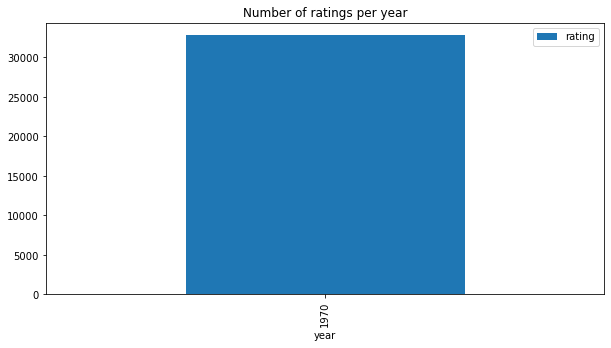

In [25]:
df[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

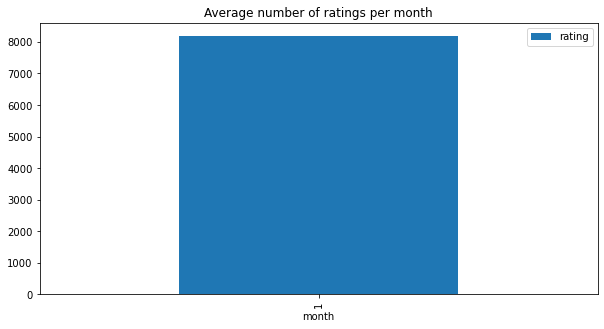

In [26]:
df_temp = df[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp['rating'] = df_temp['rating'] / 4
df_temp.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5));


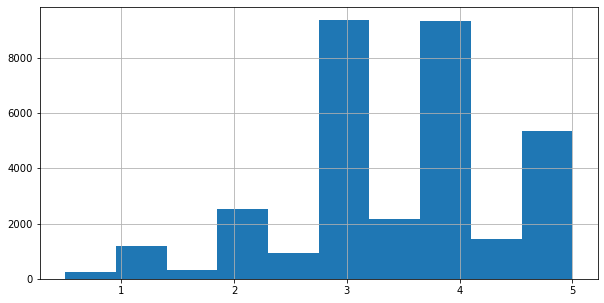

In [27]:
df['rating'].hist(figsize=(10, 5));

We can see that most common rating value is 3&4 with an approximate count of 85000k. As we have 32k ratings we can say that around 35% of ratings are of value 3&4 followed by approximately 26% and 21% respectively for 3 and 5. Since we have only one months data available for year 1970, these calculation is not fully accurate. But We can can see that most of the people give rating around 3.5&4.5.


Now let's focus on the users. We have seen that there are 994 unique users. Let's see top 10 users based on number of ratings.

In [34]:
df['userID'].value_counts().nlargest(n=10)

903    490
156    318
775    283
982    275
298    253
330    217
579    211
741    205
116    194
184    191
Name: userID, dtype: int64

In [36]:
type(df['userID'].value_counts())

pandas.core.series.Series

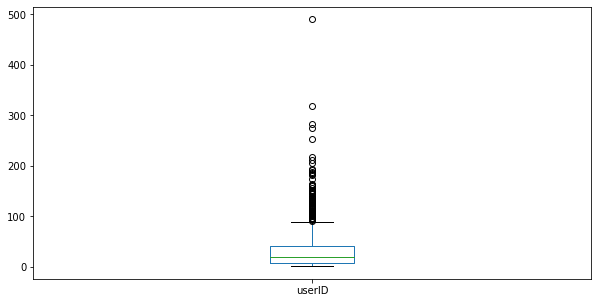

In [37]:
df['userID'].value_counts().plot.box(figsize=(10, 5));

We can see that median is around 50. We can users with number of reviews more than extreme value(approximately 100).

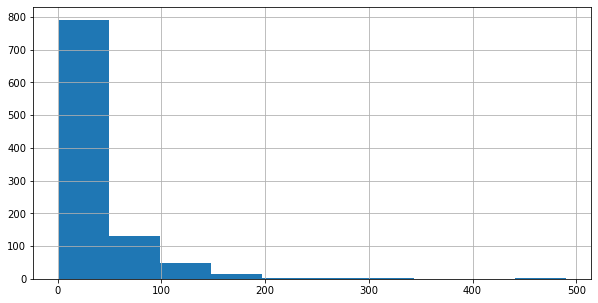

In [38]:
df['userID'].value_counts().hist(figsize=(10, 5));

From the histogram we can observe that most of the people(around 799) are having number of reviews in the range of 1 to 50. Around 200 people are having 50-180 reviews. 50-300(approximate) people are having more than 150 reviews.

Let's see top 10 trails based on number of reviews.

In [40]:
df['Trail_id'].value_counts().nlargest(n=10)

296    498
356    488
593    446
318    442
480    425
110    387
260    379
589    368
527    367
457    336
Name: Trail_id, dtype: int64

Traill with id 296 is having more number of reviews. Now let's see the distribution of number of reviews.

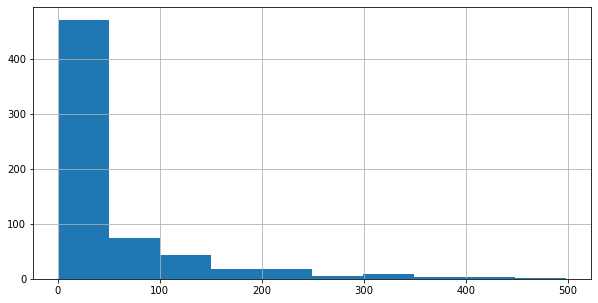

In [42]:
df['Trail_id'].value_counts().hist(figsize=(10, 5));

We can observe that approximately 500(90%) of trails having number of reviews in the range of 1-50. Rest of the trails are having more than 100(approximate) reviews.

High Rated Trails

In [43]:

high_rated= df['rating']>4.0
df[high_rated].head(10)

,userID,Trail_id,rating,timestamp,Name,Location,Eleivation_Gain,AVG_Rating,estimateTime,Description,...,Activity Type 9,Activity Type 10,Activity Type 11,Activity Type 12,Activity Type 13,Activity Type 14,Activity Type 15,year,month,date
2,678,700,4.5,1970-01-01,Round Beltra Lake,"Newport, County Mayo, Ireland",1383 ft,3.7,36 m,Round Beltra Lake is a 19.0 kilometer loop tra...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
15,678,529,5.0,1970-01-01,Foil Dearg Loop,"Ballyporeen, County Tipperary, Ireland",2547 ft,4.9,4 h 6 m,"Shortly after leaving your starting point, you...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
32,679,17,5.0,1970-01-01,Carrauntoohil via Coomloughra Horseshoe,Killarney National Park,"3,553 ft",4.9,5 h 38 m,This incredible hike has a bit of everything: ...,...,wildlife,no shade,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
33,681,79,4.5,1970-01-01,Inchavore Valley to Lough Dan,Wicklow Mountains National Park,858 ft,4.1,3 h,This is a relatively straightforward semi-loop...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
39,680,593,5.0,1970-01-01,Brittas Lake Circular,"Clonaslee, County Laois, Ireland",231 ft,3.2,1 h 30 m,Beautiful leafy circular walk which includes B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
49,680,318,5.0,1970-01-01,Dinis Cottage and Meeting of the Waters,Killarney National Park,352 ft,3.3,1 h 4 m,The Meeting of the Waters is situated where th...,...,views,wildlife,wildflowers,no dogs,NaN,NaN,NaN,1970,1,1970-01-01
50,680,303,5.0,1970-01-01,Dromore Wood Loop,Dromore Wood,2219 ft,3.6,1 h 59 m,"This is a nice, flat forest trail with great l...",...,views,wildlife,wildflowwer,NaN,NaN,NaN,NaN,1970,1,1970-01-01
55,679,616,5.0,1970-01-01,Gweedore Station to Dunlewey Centre,"Machaire Chlochair, County Donegal, Ireland",591 ft,3.5,5 h 7 m,Gweedore Station to Dunlewey Centre is a 10.3 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
64,678,372,5.0,1970-01-01,Rostellan Loop,"Whitegate, County Cork, Ireland",1029 ft,3.3,56 m,Rostellan Loop is a 2 mile lightly trafficked ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01
65,678,89,5.0,1970-01-01,Avondale House via Jubilee loop,"Rathdrum, County Wicklow, Ireland",2149 ft,4.2,3 h 19 m,This is a lovely forest walk along the river. ...,...,wildflower,wildlife,NaN,NaN,NaN,NaN,NaN,1970,1,1970-01-01


In [45]:
#top 10 most rated Trails
trail_rated = df.groupby('Name').size().sort_values(ascending=False)[:10]
trail_rated.head(10)

Name
Castlegale Loop                                              498
Glencolumcille Tower Loop                                    488
Brittas Lake Circular                                        446
Dinis Cottage and Meeting of the Waters                      442
Durrow Heritage Walking Tour                                 425
Crone Wood to Djouce                                         387
May Park Trail                                               379
Knockea                                                      368
Tibradden to Stepaside                                       367
Ranelagh, Phoenix Park, Islandbridge, St. Stephen's Green    336
dtype: int64

In [46]:
df.groupby('Name')['rating'].count().sort_values(ascending=False).head()

Name
Castlegale Loop                            498
Glencolumcille Tower Loop                  488
Brittas Lake Circular                      446
Dinis Cottage and Meeting of the Waters    442
Durrow Heritage Walking Tour               425
Name: rating, dtype: int64

In [47]:
ratings_mean_count = pd.DataFrame(df.groupby('Name')['rating'].mean())

In [48]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('Name')['rating'].count())

In [49]:
ratings_mean_count.head()

,rating,rating_counts
Name,,
Aghla Beg and Aghla More,4.400000,5
An Cnapan Mor and Croaghskearda Loop,4.142857,7
Annesgrove Gardens Loop,4.666667,6
"Annestown Stream, Beach and Dunhill Castle",3.435644,101
Ardmore Cliff Walk,4.642857,7


You can see traill title, along with the average rating and number of ratings for the trail.

Let's plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe.

<AxesSubplot:>

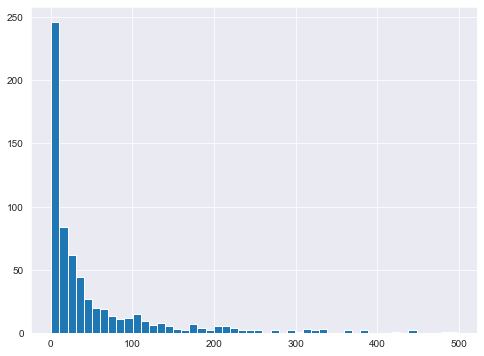

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

From the output, you can see that most of the trails have received less than 50 ratings. While the number of trails having more than 100 ratings is very low.

Now we'll plot a histogram for average ratings. Here is the code to do so:

<AxesSubplot:>

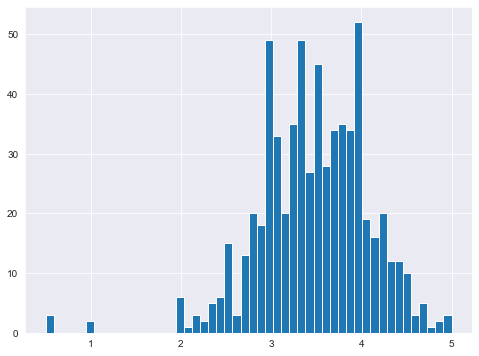

In [51]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

we can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.